In [13]:
import ugradio
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline


In [18]:
def scaleToReal(analog_values, volt_range=[-1, 1]):
    type_info = np.iinfo(np.int16)

    x1 = volt_range[0]
    x2 = volt_range[1]

    a1 = type_info.min
    a2 = type_info.max

    real_values = []
    real2_values = []
    for i in analog_values:
        real_values.append(float(x2 - x1) * float(i - a1) / float(a2 - a1) + x1)
    return np.asarray(real_values)

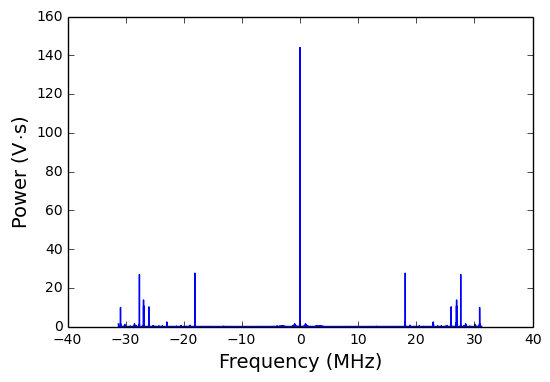

In [25]:
v_samp = 62.5
filename = "initial_test_100mV_1.npy"
arr = np.load(filename)
arr = scaleToReal(arr, [-.1, .1])
dual_imag = arr[len(arr)/2:]
dual_real = arr[:len(arr)/2]
FT = np.fft.fft(arr)
freqs = np.fft.fftfreq(len(FT), 1/v_samp)
power = np.abs(FT)**2
pl.plot(np.fft.fftshift(freqs), np.fft.fftshift(power))
pl.xlabel("Frequency (MHz)", fontsize=14)
pl.ylabel("Power (V$\cdot$s)", fontsize=14)

In [87]:
def plotPower(filename, xlabel, ylabel, N=1, max_volt=.1):
    v_samp = 62.5/N
    arr = np.load(filename)
    print arr
    #arr = scaleToReal(arr, [-.1, .1])
    dual_imag = arr[len(arr)/2:]
    dual_real = arr[:len(arr)/2]
    complex_arr = dual_real + np.multiply(1j, dual_imag)
    #FT = np.fft.fft(complex_arr)
    #freqs = np.fft.fftfreq(len(FT), 1/v_samp)
    #power = np.abs(FT)**2
    freqs, FT = ugradio.dft.dft(complex_arr[:4096], vsamp=4)
    print freqs
    power = np.abs(FT)**2
    pl.plot(freqs, power)
    pl.xlabel(xlabel, fontsize=14)
    pl.ylabel(ylabel, fontsize=14)

(array([  4.88281250e-07,   9.76562500e-07,   6.34765625e-06,
          0.00000000e+00,   1.25325521e-05,   2.84830729e-05,
          7.58463542e-05,   0.00000000e+00,   1.04654948e-04,
          1.89453125e-04,   3.01432292e-04,   0.00000000e+00,
          4.75097656e-04,   8.80533854e-04,   7.66764323e-04,
          0.00000000e+00,   7.21191406e-04,   6.06282552e-04,
          5.09765625e-04,   0.00000000e+00,   2.27376302e-04,
          1.33138021e-04,   8.28450521e-05,   0.00000000e+00,
          4.86653646e-05,   2.49023437e-05,   8.78906250e-06,
          0.00000000e+00,   1.79036458e-06,   6.51041667e-07,
          1.62760417e-07,   1.62760417e-07]),
 array([-2560., -2368., -2176., -1984., -1792., -1600., -1408., -1216.,
        -1024.,  -832.,  -640.,  -448.,  -256.,   -64.,   128.,   320.,
          512.,   704.,   896.,  1088.,  1280.,  1472.,  1664.,  1856.,
         2048.,  2240.,  2432.,  2624.,  2816.,  3008.,  3200.,  3392.,
         3584.]),
 <a list of 32 Patch objects

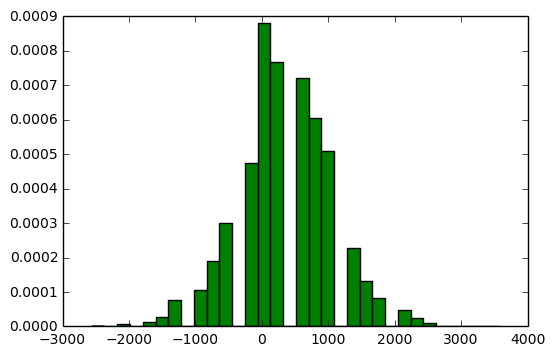

In [98]:
filename = "initial_test_50mV.npy"
filename2 = "usb_1421MHz.npy"
arr = np.load(filename)
pl.hist(arr, bins=32, color = "green", normed=True)

[ 256    0    0 ..., -768 -768    0]
[-2.         -1.99902344 -1.99804688 ...,  1.99707031  1.99804688
  1.99902344]


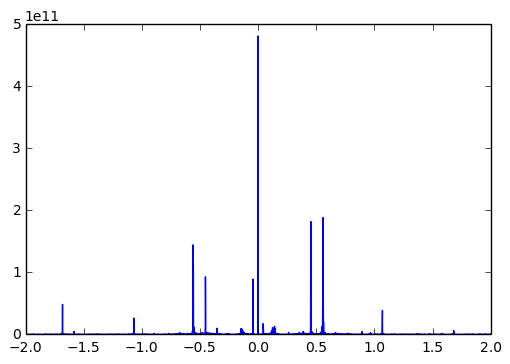

In [91]:
filename = "initial_test_100mV_1.npy"
filename_usb =  "usb_1421MHz.npy"
plotPower(filename_usb, "", "")
